# Lab 2 Template

**Author:** [YOURNAME]

**Course:** Physics 434 - Data Analysis Lab  

In this laboratory we will practice more about Variable of Transformation and Probability Distribution functions. 

## Instruction: Numpy random seed

Sometimes it's useful to have a reproducible random series for checking results. To do this, the easiest way is to set the seeding of a random number generator. For `Numpy`,

```python
import numpy as np
np.random.seed(42)
```

This makes the random numbers predictable and helps with checking results.

## Import Libraries

**TODO:** Import necessary libraries for this lab.

In [1]:
# TODO: Import numpy, matplotlib.pyplot, scipy.stats, and any other necessary libraries
# Set numpy random seed for reproducibility
import numpy as np
np.random.seed(25)

# Variable of Transformation (3 points)

For a random distribution of x between 0 and 1. With variable of transformation $u=f(x)$, we can calculate the probability density function $g(u)$ using analytic method. In this assignment, we will draw a random sample from the uniform distribution, apply a transformation to each data point, and check the consistency of transformed distributions with the analytic prediction.

## Part 1: Transformation $u = x^2$

**TODO:** Complete the following steps:

1. Draw a 1000 events sample $x_i, i=0,1,...999$ using built-in distributions in scipy with Uniform density between 0 and 1.
2. For each value of $x_i$, calculate the transformed value $u = x^2$.
3. Draw the $u_i$ distribution. Plot the analytic solution g(u) in the same plot and compare the consistency.
4. Show details about how you derive $g(u)$ analytically.

In [2]:
import matplotlib.pyplot as plt

/var/folders/vb/dh0kj6sn5vzfg90lbgjx87wr0000gn/T/ipykernel_31808/924413085.py:12: RuntimeWarning: divide by zero encountered in divide
  gg = 1/ (2 * np.sqrt(dummyx)) # our g(u)


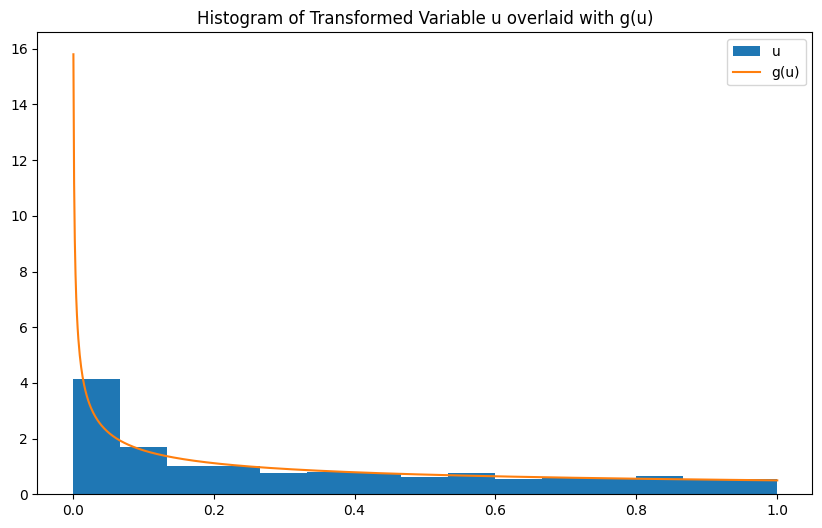

In [25]:
# TODO: Step 1 - Generate 1000 uniform random samples between 0 and 1
# Use scipy.stats.uniform or numpy.random.uniform

xx = np.random.uniform(0, 1, 1000) # this is our x

# TODO: Step 2 - Apply transformation u = x^2
uu = xx**2 # this is our u(x)

# TODO: Step 3 - Plot histogram of transformed values
# Also plot the analytical solution g(u) (worked out in the markdown cell below)
dummyx = np.linspace(0,1,1000)
gg = 1/ (2 * np.sqrt(dummyx)) # our g(u)

# Create figure
nBins = 15

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(uu, bins=nBins, density=True, label='u')
ax.set_title(f"Histogram of Transformed Variable u overlaid with g(u)")
ax.plot(dummyx, gg, label='g(u)')
ax.legend()
plt.show()
# TODO: Step 4 - Add text explaining the analytical derivation
# For u = x^2, with x ~ Uniform(0,1), derive g(u)
# - SEE MARKDOWN CELL BELOW -

for $u = x^2 = f(x)$ where $0 \le x \le 1$ -> f(x) is monotonic (increasing) -> can use Z&B eq 3.29

~~$g(u) = \int_{0}^{u}{g(u')du'} = \int_{0}^{x}{f(x')dx'}$~~

$g(u) = f(x)|\frac{dx}{du}|$ (eq 3.29)

invert u(x) to get x(u) and differentiate x(u) = sqrt(u) -> $\frac{dx}{du}=\frac{1}{2\sqrt{u}}$

f(x) is 1 (uniform distribution) -> $g(u) = 1\cdot\frac{1}{2\sqrt{u}} = \frac{1}{2\sqrt{u}}$

## Part 2: Additional Transformation

**TODO:** Repeat the analysis with one of the following transformations:
- a. $u = 1/x$
- b. $u = \sqrt{x}$
- c. $u = e^x$
- d. $u = \log(x)$

Choose one transformation and complete the same analysis as Part 1.

In [ ]:
# TODO: Choose one transformation function and repeat the analysis
# 1. Apply the chosen transformation to the uniform samples
# 2. Plot histogram of transformed values
# 3. Derive and plot the analytical solution on the same graph
# 4. Compare simulation with analytical prediction

# Throwing two dices (3 points)

We can simulate a fair dice by drawing a random uniform distribution of x between 0 and 1. There are multiple ways to do so, e.g. multiply a random number x by 6, take the integer part of the number and add it by one ($[0, 1] \rightarrow [0, 5] \rightarrow [1, 6]$), or use `numpy.random.uniform()`. This number represents the face of the dice. We can repeat this procedure to simulate rolling the dice N times.

**TODO:** Complete the following steps:

1. Simulate a pair of dices N=1000 times.
2. Calculate the sum of each pair.
3. Draw the distribution of the sum.
4. Calculate mean and variance of the distribution of the Sum.
5. Calculate the probability of Sevens (i.e. sum of two dices equals to 7) by taking the ratio of this number of Sevens to 1000. Evaluate the statistical uncertainty of the probability (assuming Binomial errors).
6. Compare the probability of Sevens from Step 5 to the analytic calculation based on the homework method. Discuss consistency between the simulation and analytical calculation.

In [ ]:
# TODO: Step 1 - Simulate throwing two dice N=1000 times
# Use numpy.random.randint(1, 7, size=(1000, 2)) or equivalent method

# TODO: Step 2 - Calculate sum of each pair

# TODO: Step 3 - Plot distribution of sums

# TODO: Step 4 - Calculate mean and variance

# TODO: Step 5 - Calculate probability of sevens and statistical uncertainty

# TODO: Step 6 - Compare with analytical calculation (1/6 probability) on a histogram plot

# Central Limit Theorem (4 points)

The central limit theorem states that the distribution of the sample mean $\bar{x}$, 
$\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i$,
of N variables $x_i$ with finite variance $\sigma^2$ in the limit $N\to \infty$ will approach a normal distribution with variance $\sigma^2/N$ independent of the form of the distribution f(x). In this computational experiment, we will test this theorem.

Generate a M=5 event sample using built-in Poisson distributions in scipy with $\lambda=2.0$. From these 5 events, calculate mean $\mu_5$ and standard deviation $\sigma_5$. Repeat this process N times. For each time, you will draw different set of M=5 events, and calculate independent $\mu_5$ and $\sigma_5$, respectively.

## Part 1: N=10 samples

In [ ]:
# TODO: Let N=10. Generate N sets of M=5 Poisson samples with lambda=2.0
# Calculate mu_5 and sigma_5 for each set
# Plot distributions of mu_5 and sigma_5
# Include mean and variance in the legend

## Part 2: N=100 samples

In [ ]:
# TODO: Let N=100. Repeat the same analysis as Part 1

## Part 3: N=1000 samples

In [ ]:
# TODO: Let N=1000. Repeat the same analysis

## Part 4: Discussion

**TODO:** Discuss your observations:
- a. Does $\mu_5$ and $\sigma_5$ approach Normal distributions when N is approaching a larger number?
- b. Is the variance of $\mu_5$ and $\sigma_5$ following some scaling rule as function of N?

*TODO: Write your discussion here*

## Part 5: M=100 events

In [ ]:
# TODO: Fix N=1000, plot distribution of mu_100 and sigma_100
# which are mean and standard deviation of a sample of M=100 events with lambda=2.0
# Discuss your observation

# Bonus (+3 points)

Generate 1000 samples. Each sample is a 100 event dataset using one built-in distribution in scipy but not Binomial, Normal nor Poisson. Show that the mean and variance of these 1000 samples also behave like a Normal Distribution.

In [ ]:
# TODO: Choose a distribution (e.g., exponential, gamma, beta, etc.)
# Generate 1000 samples of 100 events each
# Calculate mean and variance for each sample
# Show that the distributions of means and variances approach Normal

## Summary and Reflection

**TODO:** Reflect on your laboratory experience by discussing these 3 key takeaways:

### 1. Variable Transformations and Analytical Validation
Discuss how well your simulated distributions matched the analytical probability density functions you derived. What did this teach you about the relationship between mathematical transformations and probability distributions? Comment on the importance of being able to validate simulations with analytical solutions.

### 2. Monte Carlo Methods and Statistical Uncertainty
Based on your dice simulation results, evaluate the reliability of Monte Carlo methods for estimating probabilities. How did your simulated probability of sevens compare to the theoretical 1/6, and what role did statistical uncertainty play in validating your results?

### 3. Central Limit Theorem Universality
Describe your observations of how sample means approached normal distributions as sample size increased, regardless of the underlying distribution (Poisson, and your bonus distribution if completed). What does this reveal about the power and universality of the Central Limit Theorem in statistical analysis?


> **📋 Important Notice:** When you have completed all sections of this lab, please download your notebook as an HTML file for submission on Canvas.
> 
> **To download as HTML:**
> 1. Go to **File** → **Download as** → **HTML (.html)**
> 2. Save the file with a descriptive name (e.g., `Lab2_YourName.html`)
> 3. Upload the HTML file to the corresponding Canvas assignment
> 
> Make sure all cells have been executed and all outputs are visible before downloading!